In [1]:
from fastai.text.all import *

# Classic methods

## IMDB Dataset

In [2]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

(#2) [Path('/home/renato/.fastai/data/imdb_sample/texts.csv'),Path('/home/renato/.fastai/data/imdb_sample/models')]

In [3]:
df = pd.read_csv(path/'texts.csv')
df.sample(3)

,label,text,is_valid
323,positive,"I do miss the company Vestron, they sure had their finger on the pulse of unique and unusual cinema back in the 1980s. This is very apparent with the astonishing Paperhouse, a film that touches me deeply each and every time I watch it.<br /><br />The idea of a girl manipulating a dream world with her drawings (thusly the dream world manipulating reality), and also connecting with and affecting the life of a boy she's never actually met, is fascinating and never disappoints. Charlotte Burke at first seems quite precocious and yet you warm up to her because by being a bit of a mischievous ch...",False
416,positive,"Dominion Tank Police is without a shell of a doubt, one of the most amazing shows ever produced, but not just in the field of animation. While the first part (Acts 1 and 2) mostly consists of action and fun, the second part is more serious and one should not treat the second part in the exact same way as first part. The subtleties are truly out of this world and the characterization is beyond brilliant. You must have an extra degree of intelligence to appreciate the intricacies of the second Part (Acts-3 and 4). I do have some complaints though. In the first part, the Tank Bonaparte quite ...",False
519,negative,"This movie had good intentions and a good story to work with. The director and screenwriter of this movie failed miserably and created a dull, boring filmstrip that made me feel like I was back in Mr. Hartford's 8th grade Social Studies class -- way back in 67.<br /><br />What a waste, will somebody please take this story and make a real movie out of it - the story deserves it.<br /><br />Every time a scene had potential, all we were left with were a few clichés, combined with black and white footage that they probably got from The History Channel to show the action. Shameful.<br /><br />O...",False


In [4]:
df.is_valid.value_counts()

is_valid
False    800
True     200
Name: count, dtype: int64

In [5]:
(df
 .groupby('is_valid', as_index=False)
 .label.value_counts()
 .assign(perc=lambda d: d['count']/d.groupby('is_valid')['count'].transform('sum'))
)

,is_valid,label,count,perc
0,False,negative,417,0.52125
1,False,positive,383,0.47875
2,True,negative,107,0.53500
3,True,positive,93,0.46500


## Preprocess data

### Split train/validation

In [6]:
x_train = df.loc[~df.is_valid, 'text'].values
y_train = df.loc[~df.is_valid, 'label'].values
x_train.shape, y_train.shape

((800,), (800,))

In [7]:
x_valid = df.loc[df.is_valid, 'text'].values
y_valid = df.loc[df.is_valid, 'label'].values
x_valid.shape, y_valid.shape

((200,), (200,))

In [8]:
for i in np.random.choice(len(x_train), 3):
    print(f'[{i:3}]: {y_train[i]}')
    print(x_train[i])
    print('-'*80)

[148]: positive
The production quality, cast, premise, authentic New England (Waterbury, CT?) locale and lush John Williams score should have resulted in a 3-4 star collectors item. Unfortunately, all we got was a passable 2 star "decent" flick, mostly memorable for what it tried to do.........bring an art house style film mainstream. The small town locale and story of ordinary people is a genre to itself, and if well done, will satisfy most grownups. Jane Fonda was unable to hide her braininess enough to make her character believable. I wondered why she wasn't doing a post doctorate at Yale instead of working in a dead end factory job in Waterbury. Robert DiNiro's character was just a bit too contrived. An illiterate, nice guy loser who turns out to actually be, with a little help from Jane's character, a 1990 version of Henry Ford or Thomas Edison.<br /><br />This genre has been more successfully handled by "Nobody's Fool" in the mid 90s and this year's (2003) "About Schmidt." I wish

### Vectorize

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df.text.head(5))
x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 664 stored elements and shape (5, 490)>

In [11]:
vectorizer.get_feature_names_out()

array(['about', 'across', 'acting', 'actors', 'actress', 'actually',
       'admiration', 'against', 'all', 'almost', 'along', 'already',
       'also', 'american', 'an', 'and', 'are', 'around', 'as', 'at',
       'awful', 'banzai', 'barrage', 'baseness', 'be', 'because', 'been',
       'before', 'begin', 'being', 'believable', 'believe', 'best',
       'better', 'between', 'big', 'bio', 'bit', 'black', 'blame',
       'blathered', 'bleeping', 'border', 'both', 'br', 'brassed',
       'british', 'but', 'by', 'came', 'camera', 'can', 'cannot',
       'career', 'caring', 'carries', 'case', 'cast', 'certainly',
       'challenges', 'change', 'character', 'characteristics', 'cheap',
       'cheery', 'chill', 'choice', 'clever', 'coleman', 'come', 'comes',
       'comforting', 'compelled', 'concentrate', 'concept', 'continually',
       'cost', 'could', 'countries', 'country', 'cruelly', 'cruelty',
       'dad', 'days', 'deal', 'declaration', 'deep', 'determine',
       'develop', 'developm

In [12]:
x[0].toarray()

array([[0.        , 0.        , 0.10775324, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13355736, 0.        , 0.        , 0.07524389,
        0.        , 0.10775324, 0.        , 0.        , 0.        ,
        0.13355736, 0.13355736, 0.        , 0.        , 0.        ,
        0.13355736, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13355736, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.10775324, 0.        ,
        0.        , 0.        , 0.        , 0.13355736, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.13355736, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [13]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')
vectorizer

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,'english'
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [14]:
x_train_vec = vectorizer.fit_transform(x_train)
x_train_vec

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52516 stored elements and shape (800, 2977)>

In [15]:
x_valid_vec = vectorizer.transform(x_valid)
x_valid_vec

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13059 stored elements and shape (200, 2977)>

In [16]:
vectorizer.get_feature_names_out()

array(['000', '10', '100', ..., 'zombie', 'zombies', 'zone'],
      shape=(2977,), dtype=object)

In [17]:
vectorizer.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

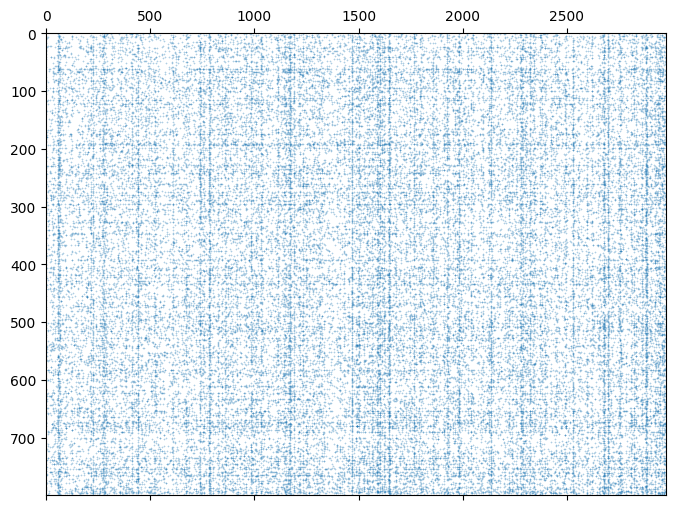

In [18]:
fig,ax = plt.subplots(figsize=(8,6))
ax.spy(x_train_vec.toarray(), markersize=0.10, aspect='auto');

## Model

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(200, max_depth=7)
rf.fit(x_train_vec, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
rf_preds = rf.predict(x_valid_vec)

In [22]:
rf_accuracy = (rf_preds==y_valid).mean()
rf_accuracy

np.float64(0.795)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg = LogisticRegression()
log_reg.fit(x_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
log_reg_preds = log_reg.predict(x_valid_vec)

In [26]:
log_reg_accuracy = (log_reg_preds==y_valid).mean()
log_reg_accuracy

np.float64(0.81)

### Results

In [27]:
df_results = pd.DataFrame({
    'text': x_valid,
    'label': y_valid,
    'rf_preds': rf_preds,
    'log_reg_preds': log_reg_preds,
})
df_results.sample(3)

,text,label,rf_preds,log_reg_preds
39,"This really doesn't match up to Castle of Cagliostro. Lupin isn't as funny or wacky or as hyperactive. The scenery and music are uninspired and plot just isn't interesting. <br /><br />The only good thing about this 'un is the nudity (only in the uncut version) provided by Fujiko. It helped spice up some of the tedious scenes. CoC had a formidable villain and set up the movie for some imaginative set-pieces. The locations in TSoTG are not very vivid or engaging. <br /><br />Zenigata, Goemon and Jigen don't even provide decent sideshow entertainment this time. It's like they were just filli...",negative,negative,negative
40,"Neil Simon's THE ODD COUPLE set up a model for many of his later plays. Felix Unger and Oscar Madison were the unsuitably paired roommates in the original, the former being picky and neat, the latter being slovenly and loose. Simon would rewrite (less successfully) the play in the 1990s as THE NEW ODD COUPLE, with female roommates. He made it a mixed couple (a woman with her daughter, and a man) in THE GOODBYE GIRLS. He also gave it an additional twist in 1973 with THE SUNSHINE BOYS, a Broadway hit starring Jack Alberson and Sam Levine as Al Lewis and Willie Clark, the aged, semi-retired V...",positive,positive,positive
167,"Of the elements that make this the best at this point, I have to say #1 is Christine McIntire. Shemp's scene when poisoned and her reaction are truly magnificent. I imagine that, as one poster suggested, Christine was trying to hold back laughter during that scene, but it actually made her seem even more deliciously evil, to be smiling at Shemp's possibly dying.<br /><br />Another character who helps this stand out is the Goon. His look was a great cross between horrific and comedic goof-ball. Hardly a character I would choose to meet in a dark alley or, for that matter anywhere. I would h...",positive,positive,positive


In [28]:
(df_results
 .pipe(lambda d: {k:(d['label']==d[k]).mean() for k in d.columns[2:]})
)

{'rf_preds': np.float64(0.795), 'log_reg_preds': np.float64(0.81)}

In [29]:
(df_results
 .loc[lambda d: (d.label!=d.rf_preds)&(d.label!=d.log_reg_preds)]
 .sample(3)
)

,text,label,rf_preds,log_reg_preds
31,"...........as I was when I saw this movie) I will never watch this movie again, not because it is a bad movie, but because it scared me so much! As I said, I was 14 when my English teacher decided to show it to us; the reason for this is that we had read an extract from the book.<br /><br />All the girls in my class were TERRIFIED when the Woman in Black comes through the window and floats over Kidd's bed, although, just before that there is something that also frightened us, which was when Kidd finds the toy soldier underneath his pillow, and he hears a child's voice say ""It's for you"". T...",positive,negative,negative
197,"Wenders was great with Million $ Hotel.I don't know how he came up with this film! The idea of giving the situation after spt11 and the view of American Society is hopeful,that makes it 2 out of ten.But this is not a movie.Is that the best someone can do with a great idea(the west-east clash).There are important things going on in middle east and it is just issued on the screen of a MAC* with the fingers of an Amerian girl who is actually at the level of stupidity(because she is just ignorant about the facts).The characters are not well shaped.And the most important thing is the idea that ...",negative,positive,positive
189,"I hope whoever coached these losers on their accents was fired. The only high points are a few of the supporting characters, 3 of 5 of my favourites were killed off by the end of the season (and one of them was a cat, to put that into perspective).<br /><br />The whole storyline is centered around sex, and nothing else. Sex with vampires, gay sex with gay vampires, gay sex with straight vampires, sex to score vampire blood, sex after drinking vampire blood, sex in front of vampires, vampire sex, non-vampire sex, sex because we're scared of vampires, sex because we're mad at vampires, sex b...",negative,positive,positive


## Bonus: NMF

In [30]:
from sklearn.decomposition import NMF

In [31]:
nmf = NMF(n_components=5)
nmf

,n_components,5
,init,None
,solver,'cd'
,beta_loss,'frobenius'
,tol,0.0001
,max_iter,200
,random_state,None
,alpha_W,0.0
,alpha_H,'same'
,l1_ratio,0.0
,verbose,0


In [32]:
x_train_nmf = nmf.fit_transform(x_train_vec, y_train)
x_train_nmf.shape

/home/renato/github/pucp_bootcamp_202401/.venv/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1728: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(800, 5)

In [33]:
nmf.components_.shape

(5, 2977)

In [34]:
def top_words(row, topk=10):
    vocab = vectorizer.get_feature_names_out()
    return [vocab[o] for o in np.argsort(row)[-topk:][::-1]]

top_words(nmf.components_[0])

['just',
 'people',
 'horror',
 'really',
 'know',
 'did',
 'films',
 'actually',
 'good',
 'fun']

In [35]:
for o in nmf.components_:
    print(top_words(o))

['just', 'people', 'horror', 'really', 'know', 'did', 'films', 'actually', 'good', 'fun']
['bad', 'acting', 'plot', 'worst', 'effects', 'don', 'terrible', 've', 'seen', 'make']
['story', 'good', 'really', 'great', 'love', 'movies', 'action', 'watch', 'characters', 'liked']
['series', 'episode', 'episodes', 'war', 'tv', 'best', 'family', 'fan', 'english', 'kids']
['life', 'man', 'time', 'young', 'role', 'family', 'john', 'character', 'cast', 'father']


![NMF](pics/nmf.png)
(source: [NMF Tutorial](http://perso.telecom-paristech.fr/~essid/teach/NMF_tutorial_ICME-2014.pdf))

## Bonus: stemming

In [ ]:
import nltk
nltk.download('wordnet')
from nltk import stem

[nltk_data] Downloading package wordnet to /home/renato/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
porter = stem.porter.PorterStemmer()
[porter.stem(word) for word in ['organize', 'organizes', 'organizing']]

['organ', 'organ', 'organ']

## Bonus: lemmatization

In [ ]:
wnl = stem.WordNetLemmatizer()
[wnl.lemmatize(word) for word in ['organize', 'organizes', 'organizing']]

['organize', 'organizes', 'organizing']